In [1]:
import keras

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os


In [4]:
labels = ['Human', 'nothuman']
folder = 'dataset'
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels:
        path = os.path.join(data_dir)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [7]:
path = os.getcwd()

In [8]:
path1 = os.path.join(path,folder)

In [9]:
path1

'C:\\Users\\HP\\Downloads\\dataset'

In [10]:
train = get_data(path1+'\\train')

<ipython-input-4-3b66eb403177>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


In [11]:
test = get_data(path1+'\\test')

<ipython-input-4-3b66eb403177>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


Text(0.5, 1.0, 'Human')

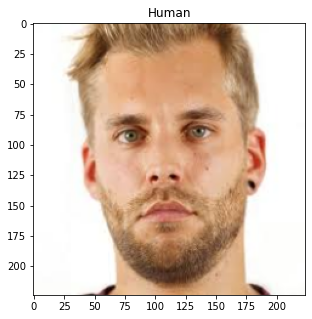

In [12]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'Human')

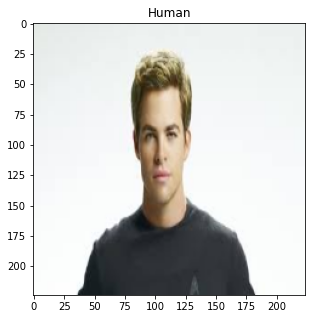

In [13]:
plt.figure(figsize = (5,5))
plt.imshow(test[1][0])
plt.title(labels[test[0][1]])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

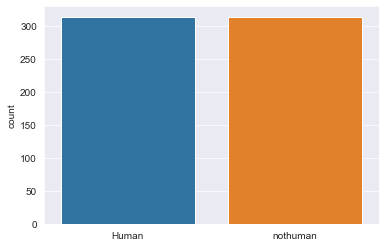

In [14]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Human")
    else:
        l.append("nothuman")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'nothuman')

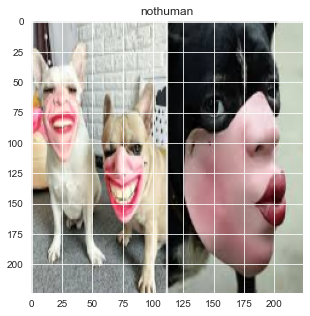

In [15]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [17]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in test:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [18]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [19]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0

In [22]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [24]:
history = model.fit(x_train,y_train,epochs = 20 , validation_data = (x_val, y_val))

Epoch 1/20
20/20 [==============================] - 119s 5s/step - loss: 0.6959 - accuracy: 0.4968 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/20
20/20 [==============================] - 75s 4s/step - loss: 0.6953 - accuracy: 0.4904 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/20
20/20 [==============================] - 74s 4s/step - loss: 0.6913 - accuracy: 0.5127 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/20
20/20 [==============================] - 69s 3s/step - loss: 0.6948 - accuracy: 0.4936 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/20
20/20 [==============================] - 84s 4s/step - loss: 0.6940 - accuracy: 0.4968 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 6/20
20/20 [==============================] - 62s 3s/step - loss: 0.6975 - accuracy: 0.4554 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/20
20/20 [==============================] - 79s 4s/step - loss: 0.6924 - accuracy: 0.5175 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 8/20
20/20 [=

In [25]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['indian (Class 0)','notindian (Class 1)']))

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


                     precision    recall  f1-score   support

   indian (Class 0)       0.50      0.81      0.62       232
notindian (Class 1)       0.50      0.19      0.27       232

           accuracy                           0.50       464
          macro avg       0.50      0.50      0.45       464
       weighted avg       0.50      0.50      0.45       464

